# Collecting the Data

In [1]:
# DEPENDENCIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import image
import tensorflow as tf
import tensorflow.keras as keras
import os

np.random.seed(42)

In [2]:
print(os.getcwd())

filepath = os.getcwd() + '/cell_images/'

print(filepath)

/Users/sampoad/Documents/Ironhack/data-labs/final-project
/Users/sampoad/Documents/Ironhack/data-labs/final-project/cell_images/


# Read in an actual image from the dataset

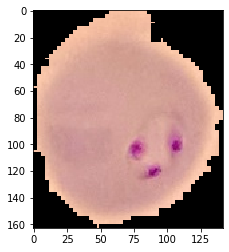

In [3]:
cell_img_array_pos_mal = image.imread('./cell_images/parasitized/C33P1thinF_IMG_20150619_114756a_cell_179.png')

plt.imshow(cell_img_array_pos_mal)

In [8]:
cell_img_array = np.asarray(image.imread('./cell_images/parasitized/C33P1thinF_IMG_20150619_114756a_cell_179.png'))

In [9]:
cell_img_array.dtype

dtype('float32')

In [10]:
cell_img_array.shape

(163, 142, 3)

In [11]:
cell_img_array

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

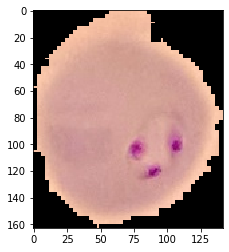

In [12]:
plt.imshow(cell_img_array)

In [18]:
# reshape to determine the total number of values in our array
cell_img_array.reshape(-1, 3).shape

(23146, 3)

# Iterate through my directory of images (one for positive malaria, one for negative)


In [14]:
# quick check to confirm the shape of the images
img_sizes = []

for filename in os.listdir(filepath + 'Parasitized'):
    if filename.endswith('.png'):
        img_size = np.asarray(image.imread(filepath + 'Parasitized/' + filename).shape)
        img_sizes.append(img_size)
    
print(img_sizes[:5]) # so not every image is the same size

[array([115, 112,   3]), array([121, 118,   3]), array([169, 148,   3]), array([106, 136,   3]), array([ 91, 103,   3])]


In [33]:
para_imgs = []

for filename in os.listdir(filepath + 'Parasitized'):
    if filename.endswith('.png'):
        img_array = np.asarray(image.imread(filepath + 'Parasitized/' + filename))
    
#     para_imgs.append(img_array)
    para_imgs.append(np.ravel(img_array))


In [35]:
115 * 112 * 3

38640

In [36]:
print(para_imgs[0])


[0. 0. 0. ... 0. 0. 0.]


In [37]:
print(len(para_imgs[0]))

38640


In [38]:
para_imgs[0].shape

(38640,)

In [39]:
set(para_imgs[0]) # the image arrays are already scaled?

{0.0,
 0.011764706,
 0.015686275,
 0.039215688,
 0.047058824,
 0.050980393,
 0.05882353,
 0.0627451,
 0.06666667,
 0.07058824,
 0.07450981,
 0.078431375,
 0.08235294,
 0.08627451,
 0.09019608,
 0.09411765,
 0.09803922,
 0.101960786,
 0.105882354,
 0.10980392,
 0.11372549,
 0.11764706,
 0.12156863,
 0.1254902,
 0.12941177,
 0.13333334,
 0.13725491,
 0.14117648,
 0.14509805,
 0.14901961,
 0.15294118,
 0.16078432,
 0.16470589,
 0.16862746,
 0.17254902,
 0.1764706,
 0.18039216,
 0.18431373,
 0.1882353,
 0.19215687,
 0.2,
 0.20392157,
 0.20784314,
 0.21176471,
 0.21568628,
 0.21960784,
 0.22352941,
 0.22745098,
 0.23137255,
 0.23529412,
 0.23921569,
 0.24313726,
 0.24705882,
 0.2509804,
 0.25490198,
 0.25882354,
 0.2627451,
 0.26666668,
 0.27058825,
 0.27450982,
 0.2784314,
 0.28235295,
 0.28627452,
 0.2901961,
 0.29411766,
 0.29803923,
 0.3019608,
 0.30588236,
 0.30980393,
 0.3137255,
 0.31764707,
 0.32156864,
 0.3254902,
 0.32941177,
 0.33333334,
 0.3372549,
 0.34117648,
 0.34509805,
 0.3

In [40]:
print(len(para_imgs)) # returns 13,780 so what should be my Train_Test_Split amount? 

13780


In [41]:
len(para_imgs) * 0.85 # so the first 11,713 images are my train_X, no, you're failing to account for the uninfected images!!

# so train_y would, in this case, 

11713.0

In [94]:

for i, filename in enumerate(os.listdir(filepath + 'Parasitized')):
    if filename.endswith('.png'):
        df.append( dict(np.ravel(asarray(image.imread(filepath + 'Parasitized/' + filename)))))
#         df.loc[i] = np.ravel(asarray(image.imread(filepath + 'Parasitized/' + filename)))
#         print(i, filename)

df.head()

SyntaxError: invalid syntax (<ipython-input-94-74d7695acd0f>, line 3)

### After reading all the information in as an array, normalize and scale it, then apply it to a dataframe. 
on that dataframe, add the Class label that corresponds. 

and then do the same for the non-parasitized images